In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wf=pd.read_csv('features.csv')
ws=pd.read_csv('stores.csv')
wt=pd.read_csv('train.csv')
# wt=wt.merge(ws,how='left').merge(wf,how='left')
train=wt.merge(ws,how='left').merge(wf,how='left')
train.head(1)
num=pd.DataFrame()
cat=pd.DataFrame()

In [2]:
num['Weekly_Sales']=train['Weekly_Sales']
num['Weekly_Sales'].isnull().sum()

0

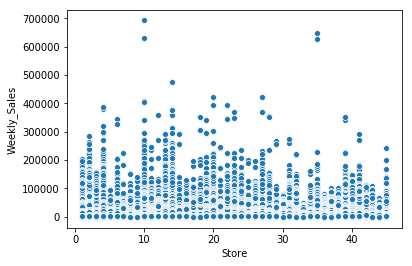

In [3]:
num['Store']=train['Store']
num['Store'].isnull().sum()
sns.scatterplot(x='Store',y='Weekly_Sales',data=num)

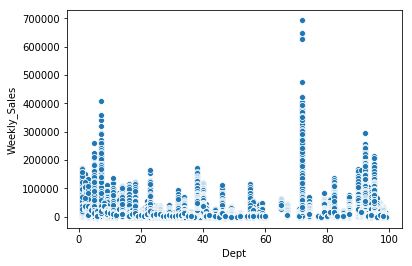

In [4]:
num['Dept']=train['Dept']
num['Dept'].isnull().sum()
sns.scatterplot(x='Dept',y='Weekly_Sales',data=num)

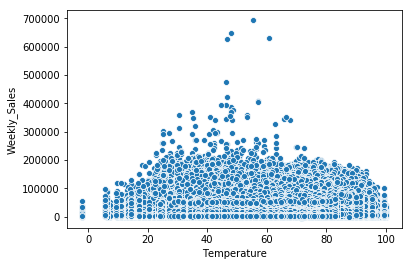

In [5]:
num['Temperature']=train['Temperature']
num['Temperature'].isnull().sum()
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=num)

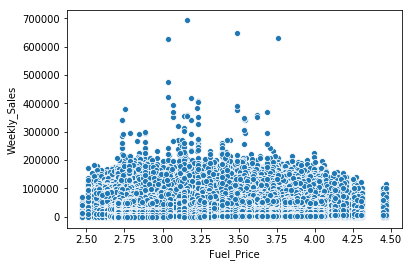

In [6]:
num['Fuel_Price']=train['Fuel_Price']
num['Fuel_Price'].isnull().sum()

sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=num)

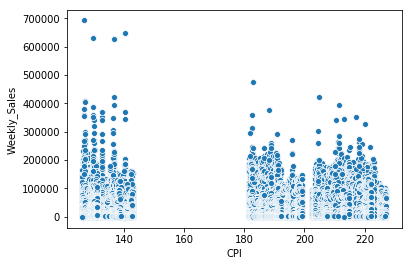

In [7]:
num['CPI']=train['CPI']
num['CPI'].isnull().sum()
sns.scatterplot(x='CPI',y='Weekly_Sales',data=num)

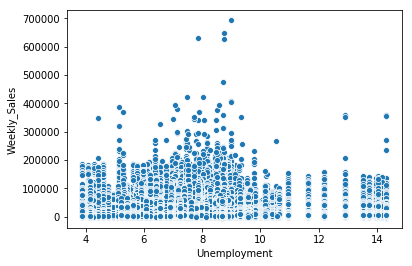

In [8]:
num['Unemployment']=train['Unemployment']
num['Unemployment'].isnull().sum()
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=num)

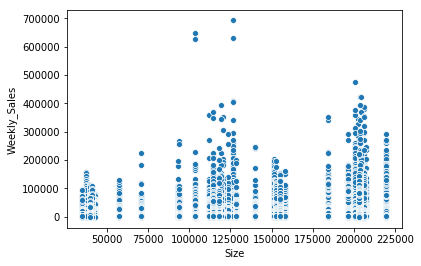

In [9]:
num['Size']=train['Size']
num['Size'].isnull().sum()
sns.scatterplot(x='Size',y='Weekly_Sales',data=num)

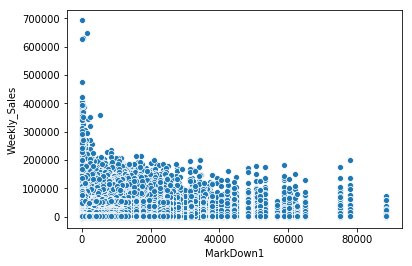

In [10]:
num['MarkDown1']=train['MarkDown1']
num['MarkDown1'].fillna(0,inplace=True)
num['MarkDown1'].isnull().sum()
sns.scatterplot(x='MarkDown1',y='Weekly_Sales',data=num)

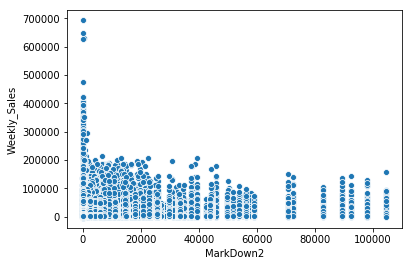

In [11]:
num['MarkDown2']=train['MarkDown2']
num['MarkDown2'].fillna(0,inplace=True)
num['MarkDown2'].isnull().sum()
sns.scatterplot(x='MarkDown2',y='Weekly_Sales',data=num)

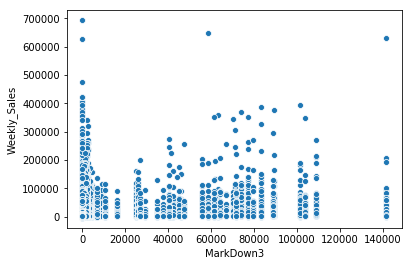

In [12]:
num['MarkDown3']=train['MarkDown3']
num['MarkDown3'].fillna(0,inplace=True)
num['MarkDown3'].isnull().sum()
sns.scatterplot(x='MarkDown3',y='Weekly_Sales',data=num)

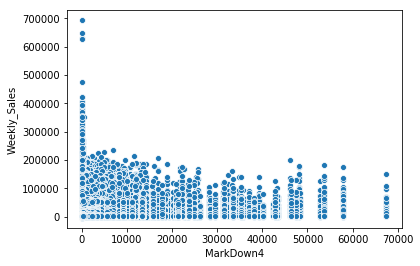

In [13]:
num['MarkDown4']=train['MarkDown4']
num['MarkDown4'].fillna(0,inplace=True)
num['MarkDown4'].isnull().sum()
sns.scatterplot(x='MarkDown4',y='Weekly_Sales',data=num)

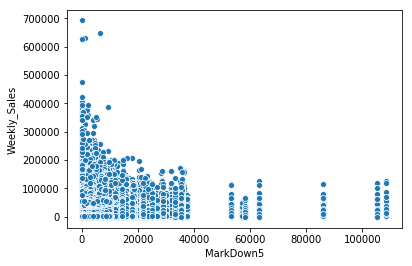

In [14]:
num['MarkDown5']=train['MarkDown5']
num['MarkDown5'].fillna(0,inplace=True)
num['MarkDown5'].isnull().sum()
sns.scatterplot(x='MarkDown5',y='Weekly_Sales',data=num)

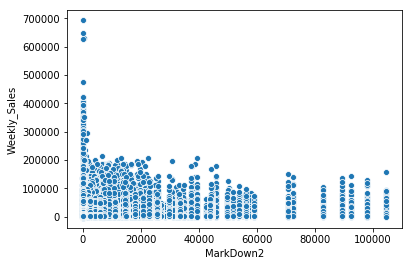

In [15]:
num['Date']=train['Date']
num['Date'].fillna(0,inplace=True)
num['Date'].isnull().sum()
sns.scatterplot(x='MarkDown2',y='Weekly_Sales',data=num)

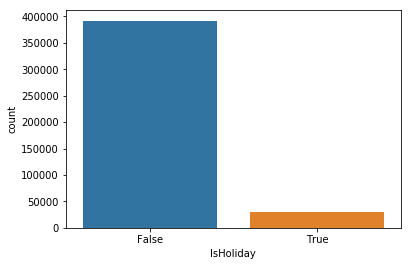

In [16]:
cat['IsHoliday']=train['IsHoliday']
cat['IsHoliday'].isnull().sum()
sns.countplot(x='IsHoliday',data=cat)

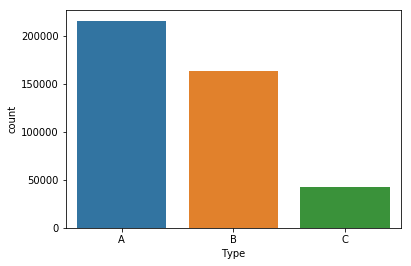

In [17]:
cat['Type']=train['Type']
cat['Type'].isnull().sum()
sns.countplot(x='Type',data=cat)

In [18]:
cat.columns

Index(['IsHoliday', 'Type'], dtype='object')

# FEATURE ENGINEERING


In [19]:
# Extracting information from Date

import time
cols =  ['Date']
for col in cols:
    train[col] = pd.to_datetime(train[col])
num['Year'] = train["Date"].dt.year
num['Month'] = train["Date"].dt.month
num['Day'] = train["Date"].dt.day
num.columns

                

Index(['Weekly_Sales', 'Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'Date', 'Year', 'Month', 'Day'],
      dtype='object')

In [20]:
# Bins for store

bins=np.linspace(min(num['Store']),max(num['Store']),6)
g={'0-10','10-20','20-30','30-40','40-50'}
num['Store_binned']=pd.cut(num['Store'],bins,labels=g,include_lowest=True)
num['Store_binned'].value_counts()
                 

40-50    89793
0-10     89663
20-30    87524
30-40    79529
10-20    75061
Name: Store_binned, dtype: int64

In [21]:
num['Store_binned'] = num['Store_binned'].map({"0-10":0, "10-20":1,"20-30":2, "30-40":3,"40-50":4})
num_Store_one_hot = pd.get_dummies(num['Store_binned'], 
                                     prefix='Store')

num_Store_one_hot.head()

,Store_0,Store_1,Store_2,Store_3,Store_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [22]:
# Bins for Dept

bins=np.linspace(min(num['Dept']),max(num['Dept']),6)
g={'0-20','20-40','40-60','60-80','80-100'}
num['Dept_binned']=pd.cut(num['Dept'],bins,labels=g,include_lowest=True)
num['Dept_binned'].value_counts()
                 

20-40     117472
40-60     106387
80-100     92283
60-80      68473
0-20       36955
Name: Dept_binned, dtype: int64

In [23]:
num['Dept_binned'] = num['Dept_binned'].map({"0-20":0, "20-40":1,"40-60":2, "60-80":3,"80-100":4})
num_Dept_one_hot = pd.get_dummies(num['Dept_binned'], 
                                     prefix='Dept')
num_Dept_one_hot.head()

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [24]:
# Bins for Size

num['Size'].loc[(num['Size'] >=0) & (num['Size'] <75000)] = 1
num['Size'].loc[(num['Size'] >=75000) & (num['Size'] <125000)] = 2
num['Size'].loc[(num['Size'] >=125000) & (num['Size'] <175000)] = 3
num['Size'].loc[(num['Size'] >=175000) & (num['Size'] <225000)] = 4

num_Size_one_hot = pd.get_dummies(num['Size'], 
                                     prefix='Size')
num_Size_one_hot.head(2)

C:\Users\ASHU\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Size_1,Size_2,Size_3,Size_4
0,0,0,1,0
1,0,0,1,0


In [25]:
# Bins for Temperature

bins=np.linspace(min(num['Temperature']),max(num['Temperature']),7)
g={'-20-0','0-20','20-40','40-60','60-80','80-105'}
num['Temp_binned']=pd.cut(num['Temperature'],bins,labels=g,include_lowest=True)
num['Temp_binned'].value_counts()
                 

0-20      134167
60-80     121683
40-60      85377
-20-0      44840
20-40      33438
80-105      2065
Name: Temp_binned, dtype: int64

In [26]:
num['Temp_binned'] = num['Temp_binned'].map({"-20-0":0,"0-20":1, "20-40":2,"40-60":3, "60-80":4,"80-105":5})
num_Temp_one_hot = pd.get_dummies(num['Temp_binned'], 
                                     prefix='Temperature')
num_Temp_one_hot.head()

,Temperature_0,Temperature_1,Temperature_2,Temperature_3,Temperature_4,Temperature_5
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [27]:
# Bins for Fuel_Price

bins=np.linspace(min(num['Fuel_Price']),max(num['Fuel_Price']),6)
g={'2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0','4.0-4.5'}
num['Fuel_Price']=pd.cut(num['Fuel_Price'],bins,labels=g,include_lowest=True)
num['Fuel_Price'].value_counts()

2.5-3.0    116626
3.0-3.5    112618
4.0-4.5     94004
3.5-4.0     82126
2.0-2.5     16196
Name: Fuel_Price, dtype: int64

In [28]:
num['Fuel_Price'] = num['Fuel_Price'].map({"2.0-2.5":0,"2.5-3.0":1, "3.0-3.5":2,"3.5-4.0":3, "4.0-4.5":4})
num_Fuel_one_hot = pd.get_dummies(num['Fuel_Price'], 
                                     prefix='Fuel_Price')
num_Fuel_one_hot.head()

,Fuel_Price_0,Fuel_Price_1,Fuel_Price_2,Fuel_Price_3,Fuel_Price_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [31]:
# Bins for Markdown 1

bins=np.linspace(min(num['MarkDown1']),max(num['MarkDown1']),6)
g={'-10-20000','20000-40000','40000-60000','60000-80000','80000-100000'}
num['MarkDown1']=pd.cut(num['MarkDown1'],bins,labels=g,include_lowest=True)
num['MarkDown1'].value_counts()

80000-100000    410395
60000-80000       8707
40000-60000       1687
20000-40000        570
-10-20000          211
Name: MarkDown1, dtype: int64

In [32]:
num['MarkDown1'] = num['MarkDown1'].map({"-10-20000":0,"20000-40000":1, "40000-60000":2,"60000-80000":3,"80000-100000":4})
num_MK1_one_hot = pd.get_dummies(num['MarkDown1'], 
                                     prefix='MarkDown1')
num_MK1_one_hot.head()

,MarkDown1_0,MarkDown1_1,MarkDown1_2,MarkDown1_3,MarkDown1_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [33]:
# Bins for Markdown 2

bins=np.linspace(min(num['MarkDown2']),max(num['MarkDown2']),6)
g={'-300-20000','20000-40000','40000-60000','60000-80000','80000-106000'}
num['MarkDown2']=pd.cut(num['MarkDown2'],bins,labels=g,include_lowest=True)
num['MarkDown2'].value_counts()

60000-80000     417251
-300-20000        2467
80000-106000      1344
20000-40000        292
40000-60000        216
Name: MarkDown2, dtype: int64

In [34]:
num['MarkDown2'] = num['MarkDown2'].map({"-300-20000":0,"20000-40000":1, "40000-60000":2,"60000-80000":3,"80000-106000":4})
num_MK2_one_hot = pd.get_dummies(num['MarkDown2'], 
                                     prefix='MarkDown2')
num_MK2_one_hot.head()

,MarkDown2_0,MarkDown2_1,MarkDown2_2,MarkDown2_3,MarkDown2_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [35]:
# Bins for Markdown 3

bins=np.linspace(min(num['MarkDown3']),max(num['MarkDown3']),6)
g={'-30-20000','20000-40000','40000-60000','60000-80000','80000-145000'}
num['MarkDown3']=pd.cut(num['MarkDown3'],bins,labels=g,include_lowest=True)
num['MarkDown3'].value_counts()

60000-80000     419010
40000-60000       1216
20000-40000        907
-30-20000          363
80000-145000        74
Name: MarkDown3, dtype: int64

In [36]:
num['MarkDown3'] = num['MarkDown3'].map({"-30-20000":0,"20000-40000":1, "40000-60000":2,"60000-80000":3,"80000-145000":4})
num_MK3_one_hot = pd.get_dummies(num['MarkDown3'], 
                                     prefix='MarkDown3')
num_MK3_one_hot.head()

,MarkDown3_0,MarkDown3_1,MarkDown3_2,MarkDown3_3,MarkDown3_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [37]:
# Bins for Markdown 4

bins=np.linspace(min(num['MarkDown4']),max(num['MarkDown4']),6)
g={'0-10000','10000-20000','20000-30000','30000-40000','40000-70000'}
num['MarkDown4']=pd.cut(num['MarkDown4'],bins,labels=g,include_lowest=True)
num['MarkDown4'].value_counts()

20000-30000    415550
30000-40000      3887
40000-70000      1065
10000-20000       854
0-10000           214
Name: MarkDown4, dtype: int64

In [38]:
num['MarkDown4'] = num['MarkDown4'].map({"0-10000":0,"10000-20000":1, "20000-30000":2,"30000-40000":3,"40000-70000":4})
num_MK4_one_hot = pd.get_dummies(num['MarkDown4'], 
                                     prefix='MarkDown4')
num_MK4_one_hot.head()

,MarkDown4_0,MarkDown4_1,MarkDown4_2,MarkDown4_3,MarkDown4_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [39]:
# Bins for Markdown 5

bins=np.linspace(min(num['MarkDown5']),max(num['MarkDown5']),6)
g={'0-10000','10000-20000','20000-30000','30000-40000','40000-110000'}
num['MarkDown5']=pd.cut(num['MarkDown5'],bins,labels=g,include_lowest=True)
num['MarkDown5'].value_counts()

20000-30000     419147
30000-40000       1941
10000-20000        276
40000-110000       138
0-10000             68
Name: MarkDown5, dtype: int64

In [40]:
num['MarkDown5'] = num['MarkDown5'].map({"0-10000":0,"10000-20000":1, "20000-30000":2,"30000-40000":3,"40000-110000":4})
num_MK5_one_hot = pd.get_dummies(num['MarkDown5'], 
                                     prefix='MarkDown5')
num_MK5_one_hot.head()

,MarkDown5_0,MarkDown5_1,MarkDown5_2,MarkDown5_3,MarkDown5_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [41]:
# Bins for CPI

bins=np.linspace(min(num['CPI']),max(num['CPI']),4)
g={'120.0-140.0','140.0-200.0','200.0-220.0'}
num['CPI']=pd.cut(num['CPI'],bins,labels=g,include_lowest=True)
num['CPI'].value_counts()

140.0-200.0    207891
120.0-140.0    173173
200.0-220.0     40506
Name: CPI, dtype: int64

In [42]:
num['CPI'] = num['CPI'].map({"120.0-140.0":0,"140.0-200.0":1, "200.0-220.0":2})
num_CPI_one_hot = pd.get_dummies(num['CPI'], 
                                     prefix='CPI')
num_CPI_one_hot.head()

,CPI_0,CPI_1,CPI_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
# Bins for Unemployment

bins=np.linspace(min(num['Unemployment']),max(num['Unemployment']),4)
g={'2-6','6-10','10-15'}
num['Unemployment']=pd.cut(num['Unemployment'],bins,labels=g,include_lowest=True)
num['Unemployment'].value_counts()

10-15    242641
6-10     152519
2-6       26410
Name: Unemployment, dtype: int64

In [44]:
num['Unemployment'] = num['Unemployment'].map({"2-6":0,"6-10":1, "10-15":2})
num_un_one_hot = pd.get_dummies(num['Unemployment'], 
                                     prefix='Unemployment')
num_un_one_hot.head()

,Unemployment_0,Unemployment_1,Unemployment_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [45]:
num_ty_one_hot = pd.get_dummies(cat['Type'], 
                                     prefix='Type')
num_ty_one_hot.head()

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [46]:
cat["IsHoliday"] = np.where(cat["IsHoliday"]==True,1,0)
cat["IsHoliday"].head()

0    0
1    1
2    0
3    0
4    0
Name: IsHoliday, dtype: int32

In [48]:
num_con_enc = pd.concat([num_Store_one_hot, 
                        num_Dept_one_hot,
                         num_Size_one_hot,
                         num_Temp_one_hot,
                         num_Fuel_one_hot,
                          num_MK1_one_hot,
                          num_MK2_one_hot,
                          num_MK3_one_hot,
                          num_MK4_one_hot,
                          num_MK5_one_hot,
                          num_CPI_one_hot,
                          num_un_one_hot,
                         num_ty_one_hot,
                        num['Year'],num['Day'],num['Month'],num['Weekly_Sales']] 
                        ,axis=1)
final=pd.concat([num_con_enc,cat],axis=1)
final.drop('Type',axis=1,inplace=True)
final.head(2)

,Store_0,Store_1,Store_2,Store_3,Store_4,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,...,Unemployment_1,Unemployment_2,Type_A,Type_B,Type_C,Year,Day,Month,Weekly_Sales,IsHoliday
0,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,2010,5,2,24924.50,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,2010,12,2,46039.49,1


In [49]:
final.drop(final[final['Weekly_Sales']>60000].index,inplace=True)

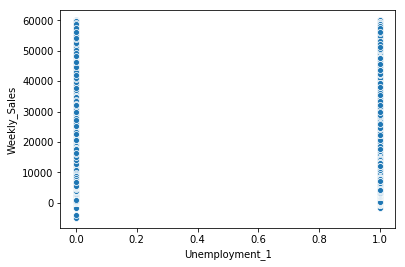

In [50]:
sns.scatterplot(x='Unemployment_1',y='Weekly_Sales',data=final)

In [51]:
y=final['Weekly_Sales']
final.drop('Weekly_Sales',axis=1,inplace=True)

In [52]:
final.shape

(399510, 63)

In [156]:
from sklearn.model_selection import train_test_split
X_train=final
y_train=y
y_train.shape

(399510,)

# Machine Learning Algo

In [79]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
def fit_ml_algo(algo,X_train,y_train,X_test,y_test):
    model=algo.fit(X_train,y_train)
    y_pred=algo.predict(X_test)
#     acc=round(model.score(X_train,y_train)*100,2)
    # Cross-Validation
#     train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    
     #Cross validation accuracy matrix
    
    acc_cv=round(mean_squared_error(y_test, y_pred)*100,2)
    print('MAE',metrics.mean_absolute_error(y_test,y_pred))
    print('R2',metrics.explained_variance_score(y_test,y_pred))
    return acc_cv

In [54]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [81]:
from xgboost import XGBRegressor
mod=XGBRegressor(n_estimators=150)
acc_cv_log = fit_ml_algo(mod, X_train, y_train,X_test,y_test)
                                                               
                                                                    
# lr=LinearRegression()
# lr.fit(X_train,y_train)
# y_pred=lr.predict(X_test)
# print ('lr error ',mean_squared_error(y_test, y_pred))
print("Accuracy: %s" % acc_cv_log)

MAE 8631.005823658073
R2 0.22509752679014772
Accuracy: 14182896198.6


In [84]:
gbr=GradientBoostingRegressor(n_estimators=150)
acc_cv_log = fit_ml_algo(gbr, X_train, y_train,X_test,y_test)
                                                               
                                                                    
# lr=LinearRegression()
# lr.fit(X_train,y_train)
# y_pred=lr.predict(X_test)
# print ('lr error ',mean_squared_error(y_test, y_pred))
print("Accuracy: %s" % acc_cv_log)

MAE 8627.66697441405
R2 0.22559463047570605
Accuracy: 14173799954.12


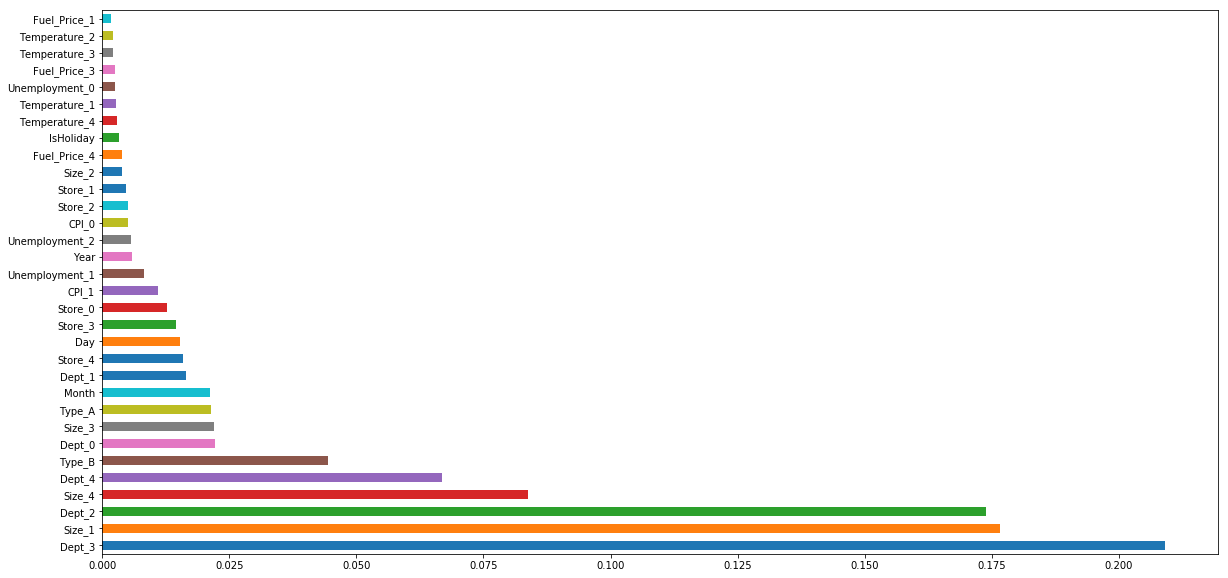

In [55]:
etr=ExtraTreesRegressor()
etr.fit(final,y)
plt.figure(figsize=(20,10))
feat_importances=pd.Series(etr.feature_importances_,index=final.columns).sort_values(ascending=False)
feat_importances.nlargest(32).plot(kind='barh')


# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [59]:
new_final=final[['Dept_0','Size_1','Dept_1','Size_4','Dept_2','Type_B','Day','Month','Dept_4','Size_2','Dept_3','Store_4','Store_3','Store_2','CPI_0','Size_3','Year','CPI_2','Unemployment_1','Unemployment_2','IsHoliday','Fuel_Price_3','Temperature_2','Store_0','Temperature_1','Store_1','Fuel_Price_0','Temperature_4','Fuel_Price_4','Unemployment_0','Fuel_Price_1','Temperature_0']]
new_final.shape

(399510, 32)

In [141]:
Xtrain=new_final
Xtrain.shape

(399510, 32)

(399510,)

In [60]:
mod=GradientBoostingRegressor(n_estimators=150)
# acc_cv_log = fit_ml_algo(mod, Xtrain, ytrain,Xtest,ytest)
                                                               
                                                                    
# lr=LinearRegression()
mod.fit(new_final,y)
# y_pred=lr.predict(X_test)
# print ('lr error ',mean_squared_error(y_test, y_pred))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
test=pd.read_csv('test.csv')
test.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [116]:
test=test.merge(ws,how='left').merge(wf,how='left')
test.shape

(115064, 15)

In [117]:
td=pd.DataFrame()

In [118]:

cols =  ['Date']
for col in cols:
    test[col] = pd.to_datetime(test[col])
td['Year'] = test["Date"].dt.year
td['Month'] = test["Date"].dt.month
td['Day'] = test["Date"].dt.day
# num.drop(['Date','year','month','day'],)
td.columns


Index(['Year', 'Month', 'Day'], dtype='object')

In [119]:
td["IsHoliday"] = np.where(test["IsHoliday"]==True,1,0)

In [120]:
# Bins for store_Test

bins=np.linspace(min(test['Store']),max(test['Store']),6)
g={'0-10','10-20','20-30','30-40','40-50'}
td['Store_binned']=pd.cut(test['Store'],bins,labels=g,include_lowest=True)
# num['Store_binned'].value_counts()

In [121]:
td['Store_binned'] = td['Store_binned'].map({"0-10":0, "10-20":1,"20-30":2, "30-40":3,"40-50":4})
# cat_test["workclass"] = cat_test["workclass"].astype(int)
test_Store_one_hot = pd.get_dummies(td['Store_binned'], 
                                     prefix='Store')

test_Store_one_hot.head()

,Store_0,Store_1,Store_2,Store_3,Store_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [122]:
# Bins for Dept

bins=np.linspace(min(test['Dept']),max(test['Dept']),6)
g={'0-20','20-40','40-60','60-80','80-100'}
td['Dept_binned']=pd.cut(test['Dept'],bins,labels=g,include_lowest=True)
td['Dept_binned'].value_counts()

20-40     32187
40-60     29298
80-100    25607
60-80     17821
0-20      10151
Name: Dept_binned, dtype: int64

In [123]:
td['Dept_binned'] = td['Dept_binned'].map({"0-20":0, "20-40":1,"40-60":2, "60-80":3,"80-100":4})
test_Dept_one_hot = pd.get_dummies(td['Dept_binned'], 
                                     prefix='Dept')
test_Dept_one_hot.head()

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [124]:
# Bins for test Fuel_Price

bins=np.linspace(min(test['Fuel_Price']),max(test['Fuel_Price']),6)
g={'2.0-2.5','2.5-3.0','3.0-3.5','3.5-4.0','4.0-4.5'}
td['Fuel_Price']=pd.cut(test['Fuel_Price'],bins,labels=g,include_lowest=True)
td['Fuel_Price'].value_counts()

2.5-3.0    44723
3.0-3.5    40496
3.5-4.0    14885
2.0-2.5    10242
4.0-4.5     4718
Name: Fuel_Price, dtype: int64

In [125]:
td['Fuel_Price'] = td['Fuel_Price'].map({"2.0-2.5":0,"2.5-3.0":1, "3.0-3.5":2,"3.5-4.0":3, "4.0-4.5":4})
test_Fuel_one_hot = pd.get_dummies(td['Fuel_Price'], 
                                     prefix='Fuel_Price')
test_Fuel_one_hot.head()

,Fuel_Price_0,Fuel_Price_1,Fuel_Price_2,Fuel_Price_3,Fuel_Price_4
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [126]:
# Bins for Temperature

bins=np.linspace(min(test['Temperature']),max(test['Temperature']),7)
g={'-20-0','0-20','20-40','40-60','60-80','80-105'}
td['Temp_binned']=pd.cut(test['Temperature'],bins,labels=g,include_lowest=True)
td['Temp_binned'].value_counts()
                 

60-80     40302
40-60     32470
0-20      26222
20-40      9425
-20-0      5815
80-105      830
Name: Temp_binned, dtype: int64

In [127]:
td['Temp_binned'] = td['Temp_binned'].map({"-20-0":0,"0-20":1, "20-40":2,"40-60":3, "60-80":4,"80-105":5})
test_Temp_one_hot = pd.get_dummies(td['Temp_binned'], 
                                     prefix='Temperature')
test_Temp_one_hot.head()

,Temperature_0,Temperature_1,Temperature_2,Temperature_3,Temperature_4,Temperature_5
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [128]:
# Bins for Size
td['Size']=test['Size']
td['Size'].loc[(td['Size'] >=0) & (td['Size'] <75000)] = 1
td['Size'].loc[(td['Size'] >=75000) & (td['Size'] <125000)] = 2
td['Size'].loc[(td['Size'] >=125000) & (td['Size'] <175000)] = 3
td['Size'].loc[(td['Size'] >=175000) & (td['Size'] <225000)] = 4

test_Size_one_hot = pd.get_dummies(td['Size'], 
                                     prefix='Size')
test_Size_one_hot.head()

,Size_1,Size_2,Size_3,Size_4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [129]:
test['Unemployment'].fillna((test['Unemployment'].mean()),inplace=True)

In [130]:
# Bins for Unemployment

bins=np.linspace(min(test['Unemployment']),max(test['Unemployment']),4)
g={'2-6','6-10','10-15'}
td['Unemployment']=pd.cut(test['Unemployment'],bins,labels=g,include_lowest=True)
td['Unemployment'].value_counts()

10-15    75276
6-10     20490
2-6      19298
Name: Unemployment, dtype: int64

In [131]:
td['Unemployment'] = td['Unemployment'].map({"2-6":0,"6-10":1, "10-15":2})
test_un_one_hot = pd.get_dummies(td['Unemployment'], 
                                     prefix='Unemployment')
test_un_one_hot.head()

,Unemployment_0,Unemployment_1,Unemployment_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [132]:
test['CPI'].fillna((test['CPI'].mean()),inplace=True)

In [133]:
# Bins for CPI

bins=np.linspace(min(test['CPI']),max(test['CPI']),4)
g={'120.0-140.0','140.0-200.0','200.0-220.0'}
td['CPI']=pd.cut(test['CPI'],bins,labels=g,include_lowest=True)
td['CPI'].value_counts()

200.0-220.0    41732
140.0-200.0    37859
120.0-140.0    35473
Name: CPI, dtype: int64

In [134]:
td['CPI'] = td['CPI'].map({"120.0-140.0":0,"140.0-200.0":1, "200.0-220.0":2})
test_CPI_one_hot = pd.get_dummies(td['CPI'], 
                                     prefix='CPI')
test_CPI_one_hot.head()

,CPI_0,CPI_1,CPI_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [135]:
td['Type']=test['Type']
test_ty_one_hot = pd.get_dummies(td['Type'], 
                                     prefix='Type')
test_ty_one_hot.head()

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [136]:
td.head()

,Year,Month,Day,IsHoliday,Store_binned,Dept_binned,Fuel_Price,Temp_binned,Size,Unemployment,CPI,Type
0,2012,11,2,0,2,1,1,4,3,2,0,A
1,2012,11,9,0,2,1,3,4,3,2,0,A
2,2012,11,16,0,2,1,3,4,3,2,0,A
3,2012,11,23,1,2,1,3,4,3,2,0,A
4,2012,11,30,0,2,1,3,4,3,2,0,A


In [137]:
test_con_enc = pd.concat([test_Store_one_hot, 
                        test_Dept_one_hot,
                        test_Temp_one_hot,
                          test_Size_one_hot,
                          test_Fuel_one_hot,
                          test_un_one_hot,
                          test_CPI_one_hot,
                          test_ty_one_hot,
                          
                          td['Year'],td['Day'],td['Month'],td['IsHoliday']] 
                        ,axis=1)
# final=pd.concat([num_con_enc,cat],axis=1)
# final.drop('Type',axis=1,inplace=True)
# final.head(2)
test_con_enc.head(5)

,Store_0,Store_1,Store_2,Store_3,Store_4,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,...,CPI_0,CPI_1,CPI_2,Type_A,Type_B,Type_C,Year,Day,Month,IsHoliday
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,2012,2,11,0
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,2012,9,11,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,2012,16,11,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,2012,23,11,1
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,2012,30,11,0


In [139]:
new_final_test=test_con_enc[['Dept_0','Size_1','Dept_1','Size_4','Dept_2','Type_B','Day','Month','Dept_4','Size_2','Dept_3','Store_4','Store_3','Store_2','CPI_0','Size_3','Year','CPI_2','Unemployment_1','Unemployment_2','IsHoliday','Fuel_Price_3','Temperature_2','Store_0','Temperature_1','Store_1','Fuel_Price_0','Temperature_4','Fuel_Price_4','Unemployment_0','Fuel_Price_1','Temperature_0']]
new_final_test.shape

(115064, 32)

In [141]:
predictions=mod.predict(new_final_test)
predictions

array([17501.73384175, 17575.33963602, 17519.95944488, ...,
       12327.92660428, 12273.78561922, 12273.78561922])

In [142]:
dataset_test=pd.DataFrame()
dataset_test['Id'] = test['Store'].astype(str) + '_' + test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
dataset_test['Weekly_Sales']=predictions

dataset_test.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,17501.733842
1,1_1_2012-11-09,17575.339636
2,1_1_2012-11-16,17519.959445
3,1_1_2012-11-23,18634.784684
4,1_1_2012-11-30,17722.901565


In [143]:
dataset_test.to_csv('submit.csv',index=False)

In [144]:
d=pd.read_csv('submit.csv')
d.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,17501.733842
1,1_1_2012-11-09,17575.339636
2,1_1_2012-11-16,17519.959445
3,1_1_2012-11-23,18634.784684
4,1_1_2012-11-30,17722.901565
